In [56]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
response = requests.get("http://quotes.toscrape.com/").text

soup = BeautifulSoup(response , 'lxml')

soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="t

In [8]:
soup.find_all("div",class_="tags")[0].text

'\n            Tags:\n            \nchange\ndeep-thoughts\nthinking\nworld\n'

In [9]:
soup.find_all("div",class_="tags")[0].text.split()

['Tags:', 'change', 'deep-thoughts', 'thinking', 'world']

In [10]:
soup.find_all("div",class_="tags")[0].text.strip()

'Tags:\n            \nchange\ndeep-thoughts\nthinking\nworld'

In [4]:
soup.find_all("span",class_="text")

[<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>,
 <span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>,
 <span class="text" itemprop="text">“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”</span>,
 <span class="text" itemprop="text">“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”</span>,
 <span class="text" itemprop="text">“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”</span>,
 <span class="text" itemprop="text">“Try not to become a man of success. Rather become a man of value.”</span>,
 <span class="text" itemprop="text">“It is better to be hated for what you are than to be loved for what you are not.

In [5]:
soup.find_all("span",class_="text")[0].text

'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'

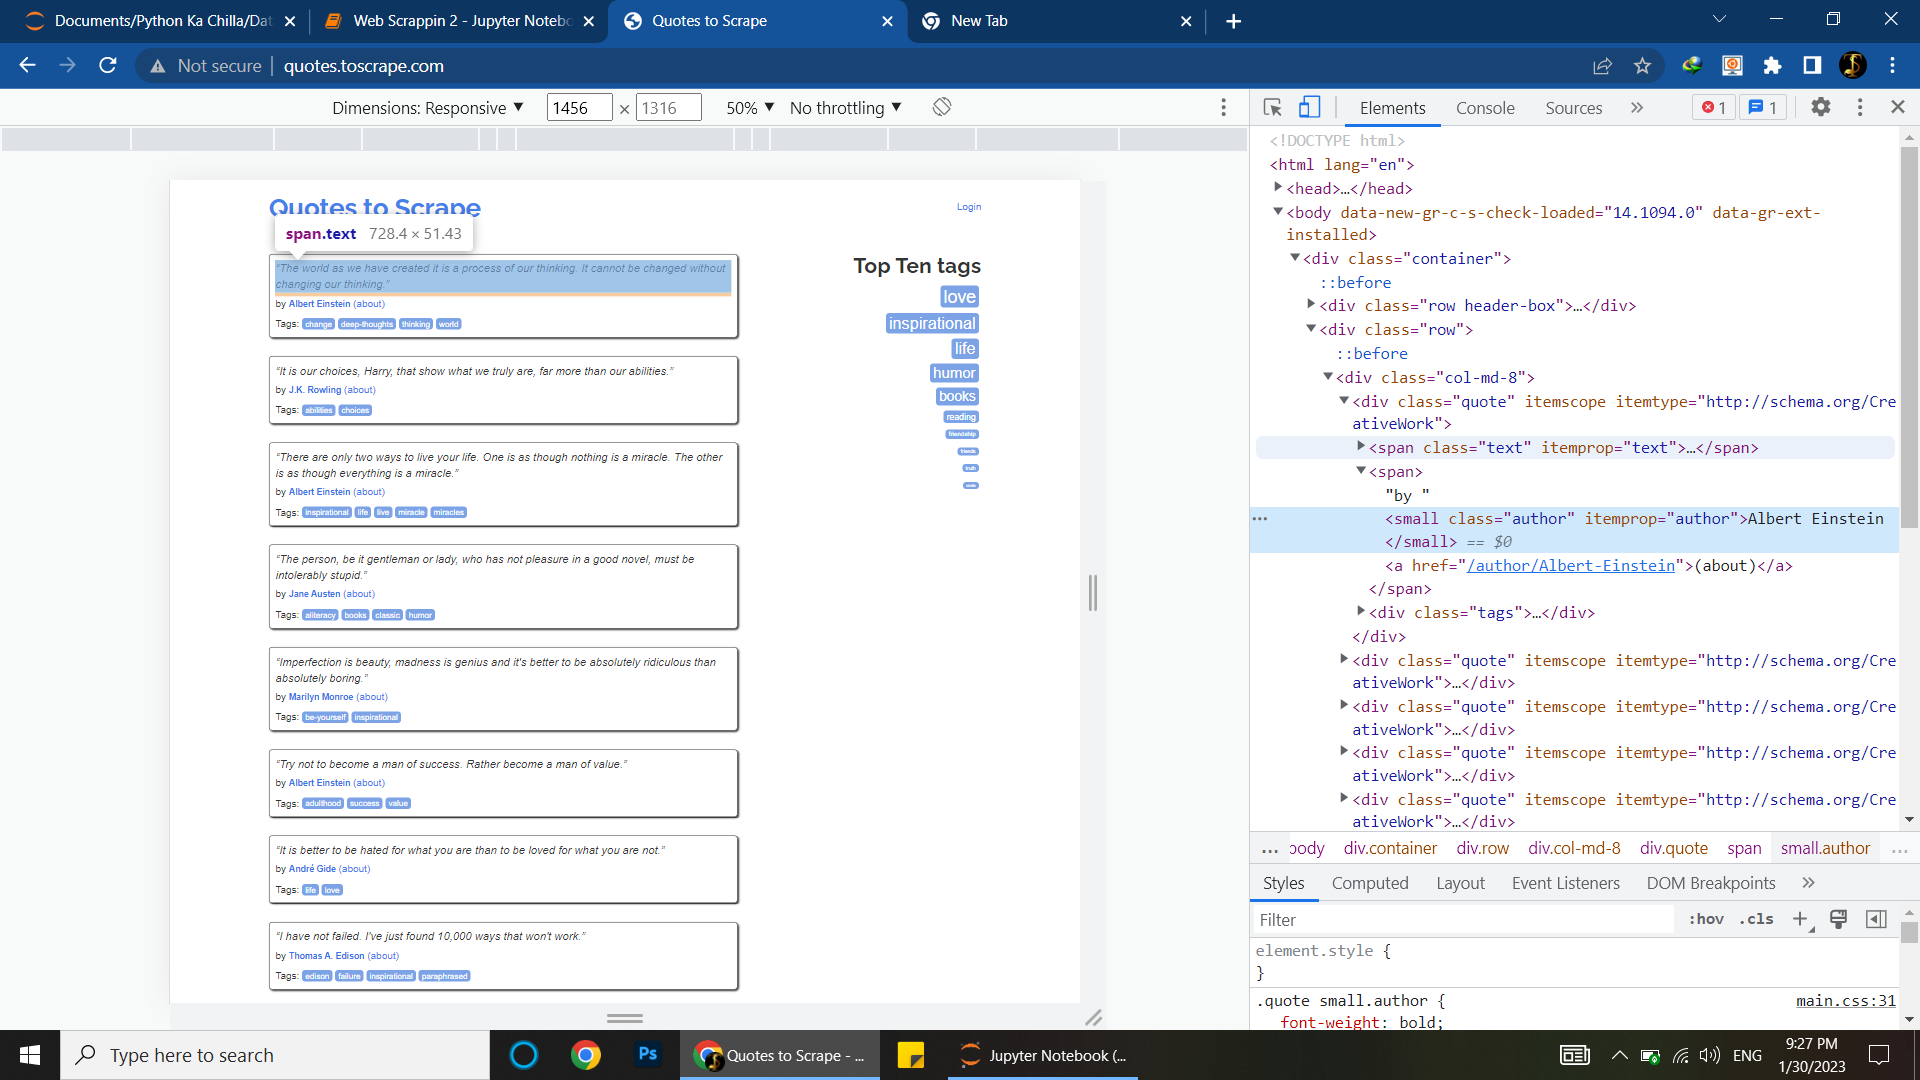

In [12]:
quote=[]
writer=[]
tags=[]
for i in soup.find_all("div", class_="quote"):
    print(i.find("div", class_="tags").text.split())

['Tags:', 'change', 'deep-thoughts', 'thinking', 'world']
['Tags:', 'abilities', 'choices']
['Tags:', 'inspirational', 'life', 'live', 'miracle', 'miracles']
['Tags:', 'aliteracy', 'books', 'classic', 'humor']
['Tags:', 'be-yourself', 'inspirational']
['Tags:', 'adulthood', 'success', 'value']
['Tags:', 'life', 'love']
['Tags:', 'edison', 'failure', 'inspirational', 'paraphrased']
['Tags:', 'misattributed-eleanor-roosevelt']
['Tags:', 'humor', 'obvious', 'simile']


In [15]:
quote=[]
writer=[]
tags=[]
for i in soup.find_all("div", class_="quote"):
    quote.append(i.find("span", class_="text").text)
    writer.append(i.find("small",class_="author").text)
    tags.append(i.find("div", class_="tags").text.split()[1:])

In [18]:
quote,writer,tags

(['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
  '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
  '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
  '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
  "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
  '“Try not to become a man of success. Rather become a man of value.”',
  '“It is better to be hated for what you are than to be loved for what you are not.”',
  "“I have not failed. I've just found 10,000 ways that won't work.”",
  "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”",
  '“A day without sunshine is like, you know, night.”'],
 ['Albert Einstein',
  'J.K. Rowling',
  'Al

### Total 10 pages
https://quotes.toscrape.com/page/10/

In [19]:
url ="https://quotes.toscrape.com/page/10/"

In [21]:
quote=[]
writer=[]
tags=[]
soup = BeautifulSoup()
for i in range(1,11):
    url="https://quotes.toscrape.com/page/{}/".format(i)
    webpage = requests.get(url).text
    soup = BeautifulSoup(webpage, "lxml")
    for i in soup.find_all("div", class_="quote"):
        quote.append(i.find("span", class_="text").text)
        writer.append(i.find("small",class_="author").text)
        tags.append(i.find("div", class_="tags").text.split()[1:])

In [22]:
df = {
    "quote" : quote,
    "writer": writer,
    "tags":tags
}

In [24]:
pd.DataFrame(df)

,quote,writer,tags
0,“The world as we have created it is a process ...,Albert Einstein,"[change, deep-thoughts, thinking, world]"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"[abilities, choices]"
2,“There are only two ways to live your life. On...,Albert Einstein,"[inspirational, life, live, miracle, miracles]"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"[aliteracy, books, classic, humor]"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"[be-yourself, inspirational]"
...,...,...,...
95,“You never really understand a person until yo...,Harper Lee,[better-life-empathy]
96,“You have to write the book that wants to be w...,Madeleine L'Engle,"[books, children, difficult, grown-ups, write,..."
97,“Never tell the truth to people who are not wo...,Mark Twain,[truth]
98,"“A person's a person, no matter how small.”",Dr. Seuss,[inspirational]


In [25]:
df=pd.DataFrame(df)

In [27]:
df.to_csv("Quotes Scraped.csv")

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

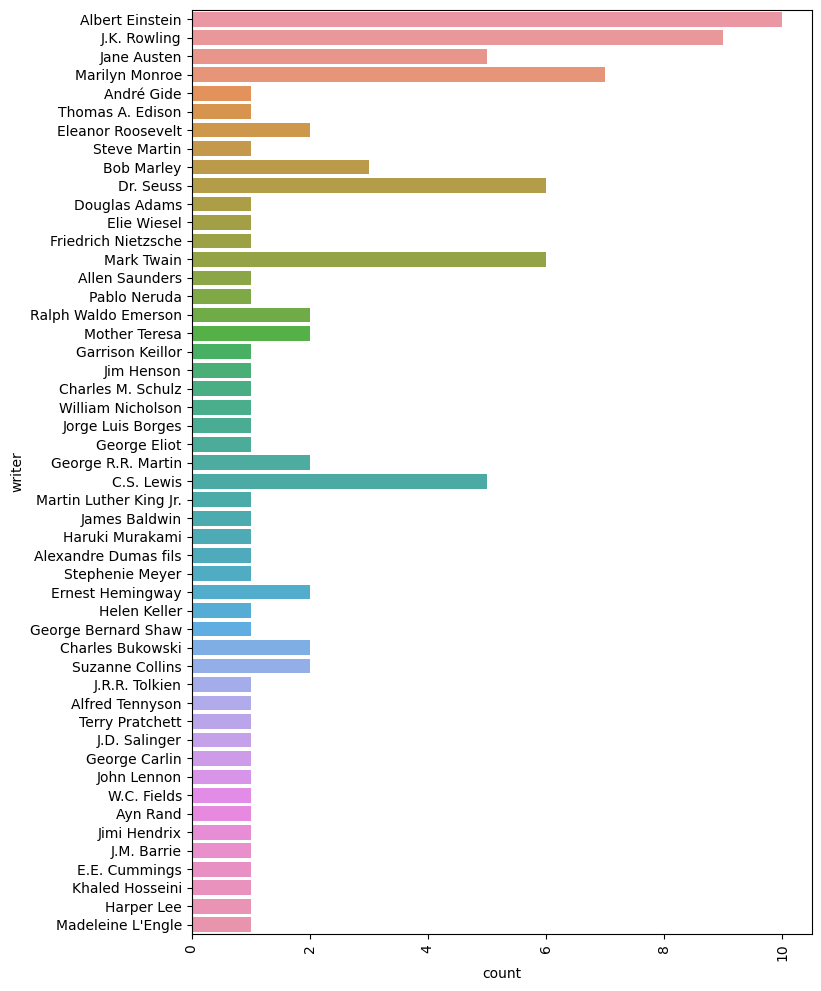

In [35]:
plt.figure(figsize=(8,12))
plt.xticks(rotation=90)
sns.countplot(y=df["writer"])
plt.show()

In [39]:
df[df["writer"] == "Albert Einstein"]["quote"]

0     “The world as we have created it is a process ...
2     “There are only two ways to live your life. On...
5     “Try not to become a man of success. Rather be...
12    “If you can't explain it to a six year old, yo...
26    “If you want your children to be intelligent, ...
28    “Logic will get you from A to Z; imagination w...
37     “Any fool can know. The point is to understand.”
44    “Life is like riding a bicycle. To keep your b...
53    “If I were not a physicist, I would probably b...
80    “Anyone who has never made a mistake has never...
Name: quote, dtype: object

In [45]:
print(df.iloc[80].quote)

“Anyone who has never made a mistake has never tried anything new.”


“Anyone who has never made a mistake has never tried anything new.”


In [47]:
x=["inspire","funny"]

x.index("funny")

1

In [50]:
if "joke" in x:
    print("true")
else:
    print("false")

false


In [53]:
x.count("funny")

1

# Find All Inspirational Quotes

In [52]:
df

,quote,writer,tags
0,“The world as we have created it is a process ...,Albert Einstein,"[change, deep-thoughts, thinking, world]"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"[abilities, choices]"
2,“There are only two ways to live your life. On...,Albert Einstein,"[inspirational, life, live, miracle, miracles]"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"[aliteracy, books, classic, humor]"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"[be-yourself, inspirational]"
...,...,...,...
95,“You never really understand a person until yo...,Harper Lee,[better-life-empathy]
96,“You have to write the book that wants to be w...,Madeleine L'Engle,"[books, children, difficult, grown-ups, write,..."
97,“Never tell the truth to people who are not wo...,Mark Twain,[truth]
98,"“A person's a person, no matter how small.”",Dr. Seuss,[inspirational]


In [58]:
for i in df["tags"]:
    if "inspirational" in i:
        print("true")
    else:
        print("false")

false
false
true
false
true
false
false
true
false
false
true
false
false
false
false
false
true
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
true
false
false
false
false
true
false
true
false
false
false
false
false
true
false
false
false
false
false
false
false
false
false
false
true
true
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
true
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
true
false


In [59]:
insp=[]
for i in df["tags"]:
    if "inspirational" in i:
        insp.append(True)
    else:
        insp.append(False)

In [67]:
df[insp]

,quote,writer,tags
2,“There are only two ways to live your life. On...,Albert Einstein,"[inspirational, life, live, miracle, miracles]"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"[be-yourself, inspirational]"
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison,"[edison, failure, inspirational, paraphrased]"
10,“This life is what you make it. No matter what...,Marilyn Monroe,"[friends, heartbreak, inspirational, life, lov..."
16,"“The opposite of love is not hate, it's indiff...",Elie Wiesel,"[activism, apathy, hate, indifference, inspira..."
34,"“To the well-organized mind, death is but the ...",J.K. Rowling,"[death, inspirational]"
39,“It is never too late to be what you might hav...,George Eliot,[inspirational]
41,“You can never get a cup of tea large enough o...,C.S. Lewis,"[books, inspirational, reading, tea]"
47,“Only in the darkness can you see the stars.”,Martin Luther King Jr.,"[hope, inspirational]"
58,"“When one door of happiness closes, another op...",Helen Keller,[inspirational]


In [65]:
df.loc["inspirational" in df["tags"]]

KeyError: 'False: boolean label can not be used without a boolean index'

In [69]:
df.iloc[76]["tags"]

['beatles',
 'connection',
 'dreamers',
 'dreaming',
 'dreams',
 'hope',
 'inspirational',
 'peace']

In [72]:
df.iloc[58].quote

'“When one door of happiness closes, another opens; but often we look so long at the closed door that we do not see the one which has been opened for us.”'